In [1]:
import aequitas
import pandas as pd
import numpy as np
from ml.data import process_data

from ml.model import train_model,slice_inference
from aequitas.group import Group
from aequitas.preprocessing import preprocess_input_df
import matplotlib.pyplot as plt
import aequitas.fairness  
import pickle
import os

In [2]:
df= pd.read_csv("../data/census_cleaned.csv")

In [3]:
cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]

In [4]:
X,y,enc, lb = process_data(df,cat_features,'salary')

In [4]:
df

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
loaded_model = pickle.load(open(os.path.join('..','model','model.pkl'), 'rb'))
loaded_encoder = pickle.load(open(os.path.join('..','model','encoder.pkl'), 'rb'))
loaded_lb = pickle.load(open(os.path.join('..','model','labeler.pkl'), 'rb'))

/home/jfund/miniconda3/envs/census_proj/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


model_id, score_thresholds 0 {'rank_abs': [1635]}


FileNotFoundError: [Errno 2] No such file or directory: 'images/slice_performance_output.png'

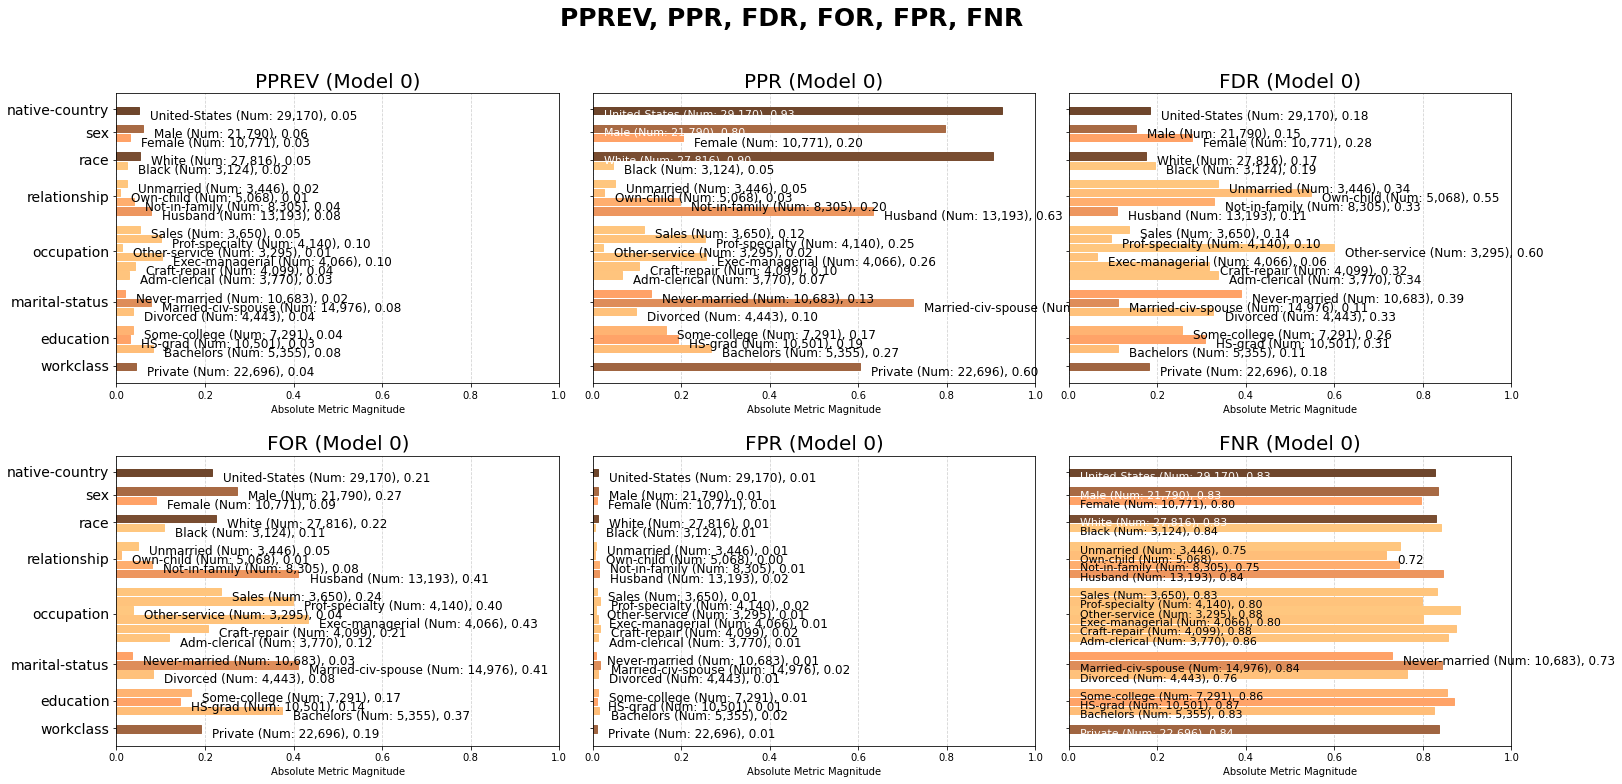

In [6]:
df['salary'] = lb.transform(df['salary']).ravel()

X_categorical = df[cat_features].values
X_continuous = df.drop(cat_features+['salary'], axis=1)
X_categorical = loaded_encoder.transform(X_categorical)

con_col = list(X_continuous.columns)
cat_col_ohe = list(loaded_encoder.get_feature_names(cat_features))
X = pd.DataFrame(np.concatenate([X_continuous, X_categorical], axis=1), columns=con_col+cat_col_ohe)
slice_inference(loaded_model,X, df.copy(), cat_features, cat_features)

In [ ]:
y = df['salary']
X = df.drop(['salary'], axis=1)
X_categorical = X[cat_features].values
X_continuous = X.drop(*[cat_features], axis=1)
X_categorical = loaded_encoder.transform(X_categorical)
y = lb.transform(y.values).ravel()

con_col = list(X_continuous.columns)
cat_col_ohe = list(loaded_encoder.get_feature_names(cat_features))
X = pd.DataFrame(np.concatenate([X_continuous, X_categorical], axis=1), columns=con_col+cat_col_ohe)
scores = loaded_model.predict(X)
df['score'] = scores
df['label_value'] = y
df = df.drop(['salary'], axis=1)

In [ ]:
slice_inference(model,df, slice_feats='all', cat_feats)

In [ ]:
[cat_features]+['score']+['label_value']

In [ ]:
# double-check that categorical columns are of type 'string'
df[cat_features] = df[cat_features].astype(str)
    
df, _ = preprocess_input_df(df[cat_features+['score']+['label_value']])

In [ ]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [ ]:
get_overall_fairness()

In [ ]:
xtab.loc[0]

In [ ]:
from aequitas.plotting import Plot
    
aqp = Plot()
fpr_plot = aqp.plot_group_metric(xtab, 'fpr')

In [ ]:
fig=aqp.plot_group_metric_all(xtab, ncols=3,show_figure=False, min_group_size=.01)
plt.savefig('../images/slice_performance_output.png')

In [ ]:
f =aequitas.fairness.Fairness()

In [ ]:
new_df,_=preprocess_input_df(df[cat_features+['score']+['label_value']])

In [ ]:
f.get_overall_fairness(new_df)

In [ ]:


f = Fairness()
fdf = f.get_group_value_fairness(bdf)



In [ ]:
slice_inference(model,df, slice_feats='all', cat_feats)